In [74]:
# Standard packages
import pandas as pd
import numpy as np
import os
import re

# Charting packages
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# See all rows
pd.set_option('display.max_rows', 100)

In [75]:
# Get data into dataframes
prices = pd.read_csv('./nyse_kaggle_dataset/prices.csv')
prices_sa = pd.read_csv('./nyse_kaggle_dataset/prices-split-adjusted.csv')
securities = pd.read_csv('./nyse_kaggle_dataset/securities.csv')
fundamentals = pd.read_csv('./nyse_kaggle_dataset/fundamentals.csv')

In [76]:
# Convert date to datetime and then a numeric format
prices['date'] = pd.to_datetime(prices['date'])
prices['date'] = (prices['date'] - prices['date'].min()) / np.timedelta64(1,'D')

# One hot encode the symbols column
prices = pd.get_dummies(prices, columns=['symbol'])

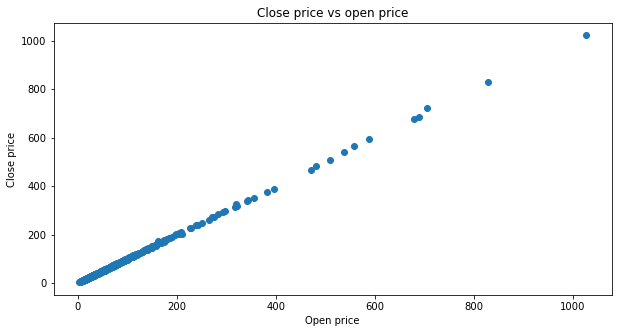

In [44]:
# Create sample
sample_size = 1000
prices_sample = prices.sample(sample_size, random_state= 42)

# Scatter plt of 'close' prices vs 'open' prices
plt.figure(figsize=(10,5))
plt.scatter(prices_sample['open'], prices_sample['close'])
plt.xlabel('Open price')
plt.ylabel('Close price')
plt.title('Close price vs open price')
plt.show()

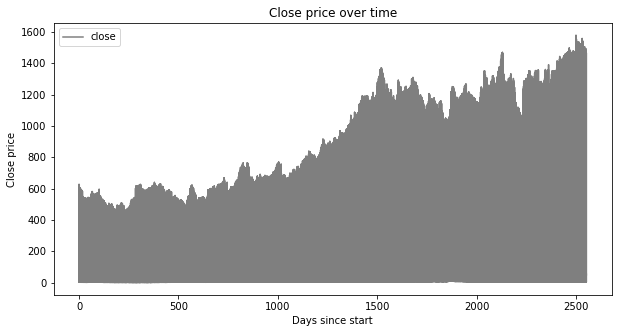

In [69]:
# Visualize the close price
plt.figure(figsize=(10,5))
plt.plot(prices['date'], prices['close'], label='close', color='black', alpha=0.5)
plt.xlabel('Days since start')
plt.ylabel('Close price')
plt.title('Close price over time')
plt.legend()
plt.show()


In [77]:
# Drop na
prices.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = prices.drop('close',axis=1)
y = prices['close']

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# train_test_split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X: (851264, 506)
Shape of y: (851264,)
Shape of X_train: (638448, 506)
Shape of y_train: (638448,)


In [78]:
# Fit the linear model
ridge = Ridge()
lasso = Lasso()
linear = LinearRegression()

for model in [ridge,lasso,linear]:
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = lr.predict(X_test)

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Check results
    print(f'Mean Squared Error for {model}: {mse:.2f}')
    print(f'Root Mean Squared Error for {model}: {rmse:.2f}')

/Users/michaelkalish/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00676e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Mean Squared Error for Ridge(): 0.41
Root Mean Squared Error for Ridge(): 0.64


/Users/michaelkalish/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553682.1964126746, tolerance: 448516.4041947432
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error for Lasso(): 0.41
Root Mean Squared Error for Lasso(): 0.64
Mean Squared Error for LinearRegression(): 0.41
Root Mean Squared Error for LinearRegression(): 0.64


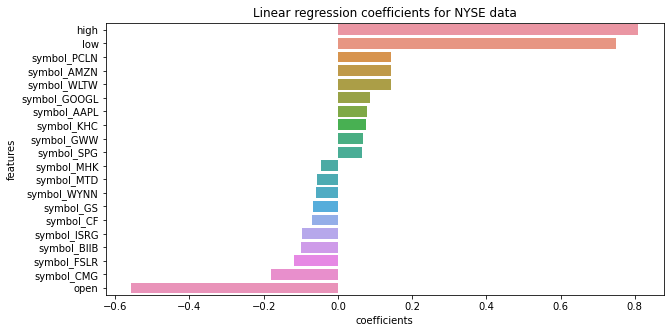

In [85]:
# Get the feature names and cooefficients
feature_names = X.columns
coefficients = linear.coef_

# Convert dataframe and sort
coeff_df = pd.DataFrame({'features':feature_names,'coefficients':coefficients})
coeff_df.sort_values('coefficients', ascending=False, inplace=True)
top_and_bottom_features = pd.concat([coeff_df.head(10),coeff_df.tail(10)])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=top_and_bottom_features, x='coefficients',y='features', orient='h')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.title('Linear regression coefficients for NYSE data')
plt.show()

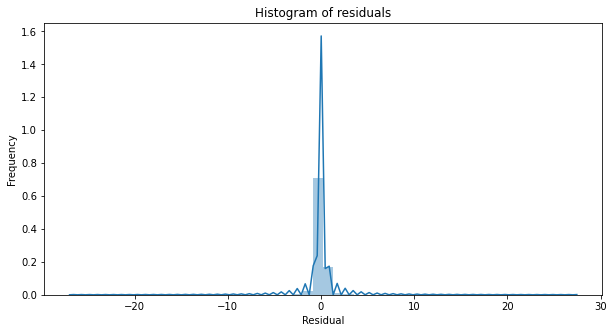

In [58]:
# Plot histogram of residuals
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
sns.distplot(residuals, bins=50,kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

In [28]:
fundamentals.head(1).T

,0
Unnamed: 0,0
Ticker Symbol,AAL
Period Ending,2012-12-31
Accounts Payable,3068000000.0
Accounts Receivable,-222000000.0
Add'l income/expense items,-1961000000.0
After Tax ROE,23.0
Capital Expenditures,-1888000000.0
Capital Surplus,4695000000.0
Cash Ratio,53.0
